# CSDS 391 - Intro to Artificial Intelligence 
### Project 2
### Ryan Doughty (rdd57)

## Exercise 1

## A)

Inspected the irisdata and plotted the 2nd and 3rd iris classes (versicolor and virginica) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

irisdata = pd.read_csv('../data/irisdata.csv')
irisdata

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
## filter the data so that we only get the second and third class
irisdata_filtered = irisdata[irisdata['species'] != 'setosa']
irisdata_filtered

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Text(0, 0.5, 'petal_width')

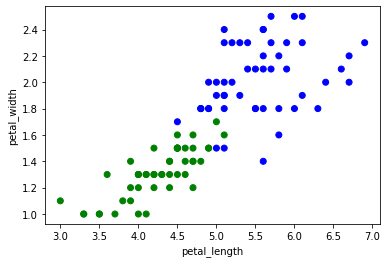

In [4]:
colors = {'virginica':'blue', 'versicolor':'green'}
plt.scatter(irisdata_filtered['petal_length'], irisdata_filtered['petal_width'], c=irisdata_filtered['species'].map(colors))
plt.xlabel('petal_length')
plt.ylabel('petal_width')

Text(0, 0.5, 'petal_width')

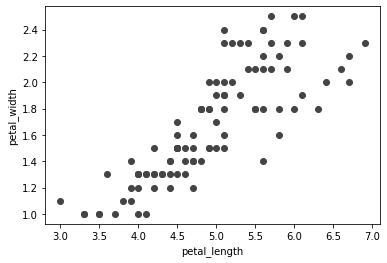

In [5]:
plt.scatter(irisdata_filtered['petal_length'], irisdata_filtered['petal_width'], c='#444444')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

## B)

Function of logistic linearity is given by 1/(1+e^f) where f in this case is w dotted with x or w[0] * petal_width + w[1] * petal_length + w[2], 

In [6]:

#Defines one-layer nueral network using a logistic non-linearity
#petal_length: x value of point (in this case petal_length)
#petal_width: y value (in this case petal_width)
#w: weights for network in form of <w0, w1, w2> --> this turns into 0 = w0 * Y + w1 * x + w2 if dot producted with x vector <x, y, 1>
#returns value between 0 and 1 depending on logistic non-linearity across the linear decision boundary

def get_output(petal_length, petal_width, w):
    # get point on boundary at given x value    
    return (1/(1+math.pow(math.e, -1*(w[0] * petal_width + w[1] * petal_length + w[2]))))

## C)

Plotting a hand made decision boundary

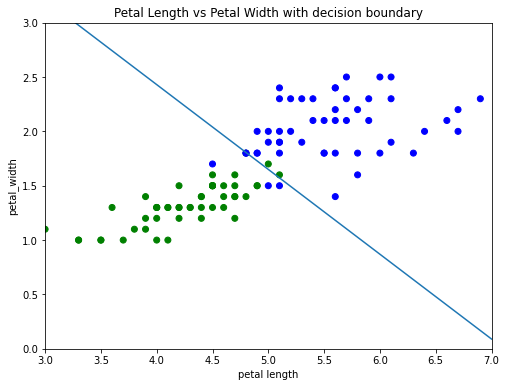

In [9]:

# Plots decision boundary for the non linearity in B overlaid on iris data
# 0 == versicolor and 1 == virginica

w = [1, 0.78, -5.55] ## weights set by hand to form of 0 = y*w[0] + x*w[1] + w[2]


def plot_decision_boundary(w):
    x = np.linspace(3, 7, 100)
    y = (x * -1 * w[1] + -1*w[2]) / w[0] ##derived from formula above by doing some basic algebra
    plt.figure(figsize = (8,6))
    ax = plt.axes()
    ax.scatter(irisdata_filtered['petal_length'], irisdata_filtered['petal_width'], c=irisdata_filtered['species'].map(colors))
    ax.set_xlabel('petal length')
    ax.set_ylabel('petal_width')
    ax.set_title('Petal Length vs Petal Width with decision boundary')
    ax.set_ylim([0, 3])
    ax.set_xlim([3, 7])
    ax.plot(x, y)

    
plot_decision_boundary(w)
    

## D)

Plotted a 3D surface of the output of the nueral network over the input space (petal width: [0, 3], petal length: [3, 7]). Colors show similar output values. 

Text(0.5, 0, 'Output')

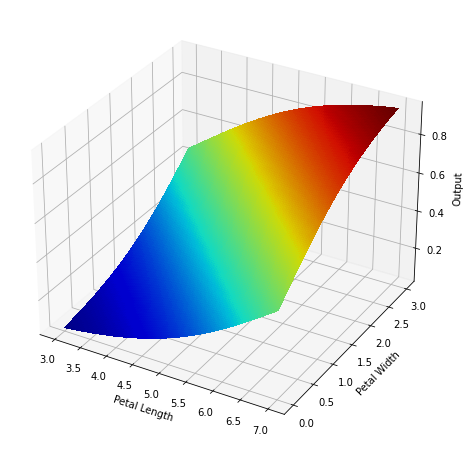

In [10]:
##Use a surface plot from a 3D plotting libary (e.g. in matlab or using matplotlib in python) to plot the 5 P.
##output of your neural network over the input space. This should be similar to learning curve shown in
##fig 19.17 (18.17 in 3rd ed.) of the textbook

from matplotlib import cm

fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection='3d')

x = np.linspace(3, 7, 100)
y = np.linspace(0, 3, 100)

X, Y = np.meshgrid(x, y)
zs = np.array([get_output(x,y,w) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

my_col = cm.jet(Z/np.amax(Z))

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors = my_col,
        linewidth=0, antialiased=False)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Output')


## E)

I first generated all of the output values for all the points

In [11]:
def get_output_from_list(x, y, w):
    outputs = []
    for petal_length, petal_width in zip(x,y):
        outputs.append(get_output(petal_length, petal_width, w))
    return outputs

In [12]:
irisdata_filtered['output'] = get_output_from_list(irisdata_filtered['petal_length'], irisdata_filtered['petal_width'], w)

<ipython-input-12-cd926af18d42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irisdata_filtered['output'] = get_output_from_list(irisdata_filtered['petal_length'], irisdata_filtered['petal_width'], w)


In [13]:
pd.set_option("display.max_rows", None)
irisdata_filtered

,sepal_length,sepal_width,petal_length,petal_width,species,output
50,7.0,3.2,4.7,1.4,versicolor,0.381308
51,6.4,3.2,4.5,1.5,versicolor,0.368188
52,6.9,3.1,4.9,1.5,versicolor,0.443246
53,5.5,2.3,4.0,1.3,versicolor,0.244161
54,6.5,2.8,4.6,1.5,versicolor,0.386511
55,5.7,2.8,4.5,1.3,versicolor,0.323004
56,6.3,3.3,4.7,1.6,versicolor,0.429473
57,4.9,2.4,3.3,1.0,versicolor,0.121746
58,6.6,2.9,4.6,1.3,versicolor,0.340290
59,5.2,2.7,3.9,1.4,versicolor,0.248244


#### To show some more exact points, I plucked a few of the examples from the table above.

1) A Versicolor point far away from the decision boundary (row 57)

In [14]:
get_output(3.3, 1.0, w)

0.121745886493239

2) A Versicolor point close to the decision boundary, but still on the versicolor side (row 70)

In [15]:
get_output(4.8, 1.8, w)

0.4985000044999837

3) A Versicolor point across the decision boundary (row 77)

In [16]:
get_output(5.0, 1.7, w)

0.5124973964842106

4) A Virginica point across the decision boundary (row 106)

In [17]:
get_output(4.5, 1.7, w)

0.4158094770645927

5) A Virginica point close to the decision boundary, but still on the virginica side (row 121)

In [18]:
get_output(4.9, 2.0, w)

0.5675838360100377

6)A virginica point far from the decision boundary (row 118)

In [20]:
get_output(6.9, 2.3, w)

0.8939747255804006

## Exercise 2

## A)

Defines a function for getting the mean_squared value of the boundary given the data vectors, the parameters of the nueral network, and the pattern classes

In [22]:
## Calculates the mean-squared error of the iris data for the neural network defined above
## The function takes three arguments: the data vectors, the parameters defining the neural
## network, and the pattern classes.

## MSE = (1/n) SUM (Yi - Ye)^2
def mean_squared(x, w, classes):
    
    length, width = zip(*x)      ## unpack the petal_length and petal_width from the x vectors
    n = 100     ## set n = 100 since that is how many values there are
    distance = 0.0     ## initially set the value of the summation to 0
    
    for x, y, species in zip(length, width, classes):
        output = get_output(x, y, w)   ## get the output from the logistic function over the linear decision boundary
        class_value = 1 if species == 'virginica' else 0   ## determine the class or expected value (1/0)
        distance = distance + math.pow((output - class_value), 2) ## do the mean squared formula and add it to the distance or total summation
    mean_squared = distance / n ##divide the summation by n
    
    return mean_squared
            

## B)

In [23]:
##Compute the mean squared error for two different settings of the weights (i.e. two dfiferent decision 5 P.
## boundaries). Like above, select these by hand and choose settings that give large and small errors
## respectively. Plot both boundaries on the dataset as above.

#### For this exercise I picked a bunch of weights, plotted the boundary, and calculated the mean-squared error. The mean-squared error is given right above the graph

With the weights I had previously used that seem decent: w = [1, 0.78, -5.55]

In [24]:
w = [1, 0.78, -5.55]
mean_squared(zip(irisdata_filtered['petal_length'], irisdata_filtered['petal_width']), w, irisdata_filtered['species'])

0.10892439622051724

With other weights that put the boundary slightly within the virginica: w = [0.4, 0.34,-2.55]

0.17630580046657174

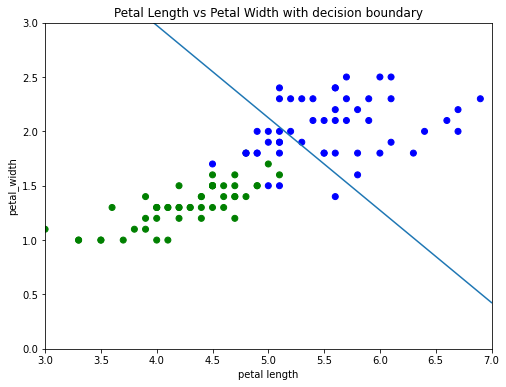

In [25]:
w = [0.4, 0.34,-2.55]
plot_decision_boundary(w)
mean_squared(zip(irisdata_filtered['petal_length'], irisdata_filtered['petal_width']), w, irisdata_filtered['species'])

With another set of weights that put the boundary slightly within the versicolor: w = [1.4, 02, -3.1]

0.1371466131250271

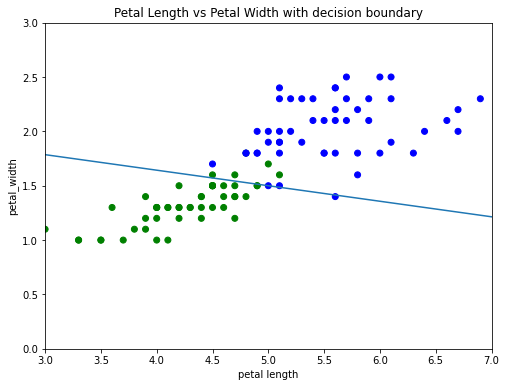

In [26]:
w = [1.4, 0.2, -3.1] 
plot_decision_boundary(w)
mean_squared(zip(irisdata_filtered['petal_length'], irisdata_filtered['petal_width']), w, irisdata_filtered['species'])

And lastly, with weights that put the boundary way within the versicolor w = [0.7, 0.2, -1.2]

0.2292200573698605

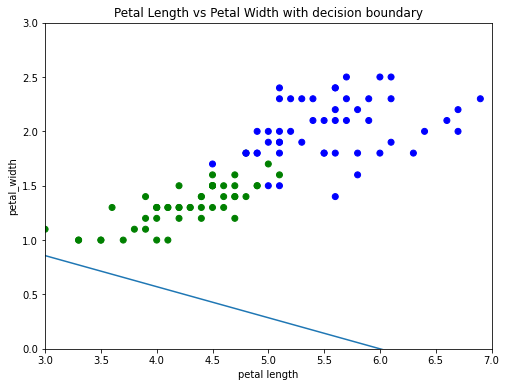

In [188]:
w = [0.7, 0.2, -1.2]
plot_decision_boundary(w)
mean_squared(zip(irisdata_filtered['petal_length'], irisdata_filtered['petal_width']), w, irisdata_filtered['species'])

As seen in those examples, when the boundary is closest to what seems most accurate (the first example), the mean_squared value is the least. As it gets further away, the mean_squared value increases. For instance, in the 3rd example (1.4, 0.2, -3.1), the decision boundary isn't too far off, so the mean_squared value is only ~0.03 different from the first example.

## C) Added at bottom of pdf in handwriting

## D) Added at bottom of pdf in handwriting

## E) 

Calculates the summed gradient for an ensemble of patterns. 

In [27]:
## Computes the summed gradient for an ensemble of patterns.
## Plots how the decision boundary changes for a small step.

## takes in ensemble of patterns in list of x and y values, in addition to the current boundary / weights and an alpha
## outputs the new weights
## x --> petal width values
## y --> petal length values
## c --> classes (type of flower as 1 or 0)
## w --> current weights in vector form <w0, w1, w2>
## a --> alpha step size

def summed_gradient(x, y, c, w, a):
    ## loop through all of the x,y (petal_length / petal_width) combinations, calculate the gradient for w0, w1, w2 and add that too a sum for each
    w0 = 0
    w1 = 0
    w2 = 0
    
    for x_, y_, species in zip(x, y, c): 
        
        class_value = 1 if species == 'virginica' else 0
        output = get_output(y_, x_, w)
        gradient = float((class_value - output) * (output * (1 - output)))
        
        w0 = w0 + gradient * x_
        w1 = w1 + gradient * y_
        w2 = w2 + gradient * 1
    
    new_weights = [w[0] + a*w0, w[1] + a*w1, w[2] + a*w2]
    return new_weights
    
    

Showing how a decision boundary changes for a small step. First I take a initial weights for the gradient and plug them into the function with the data and step size to get the new weights. Then I plot the intial boundary and second boundary to show how they update. 

In [28]:
w = [0.4, 0.34,-2.55]
w_new = summed_gradient(irisdata_filtered['petal_width'], irisdata_filtered['petal_length'], irisdata_filtered['species'], w, .001)
# w_new = summed_gradient([0], [0], ['versicolor'], w, 1)


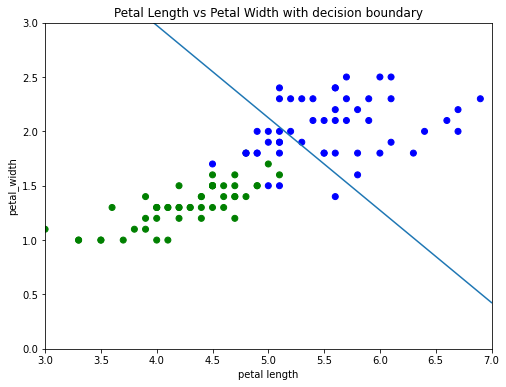

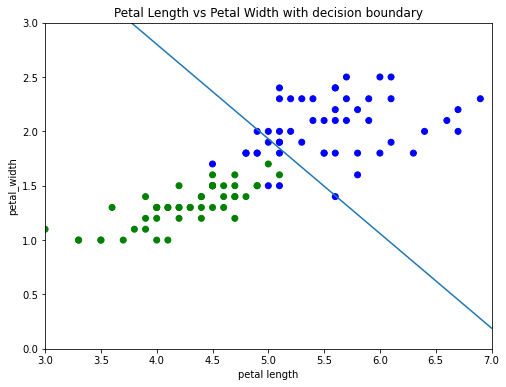

In [29]:
plot_decision_boundary(w)
plot_decision_boundary(w_new)

Since the step size is small, there is not a huge step, but it is pretty apparent that the second boundary is closer to an ideal boundary for the data.

## Exercise 3

## A)

Implementing gradient descent

In [32]:
## returns true if converged
def test_convergence(w, w_new, convergence_threshold):
    converged = False
    num_converged = 0;
    for w1, w2 in zip(w, w_new):
        if (abs((w2-w1)/w1) < convergence_threshold):
            num_converged += 1
    if num_converged == 3:
        converged = True
        
    return converged

def gradient_descent(x, y, c, w, a, convergence_threshold):
    converged = False
    
    while(not converged):
        w_new = summed_gradient(x, y, c, w, a)
        converged = test_convergence(w, w_new, convergence_threshold)
        if(not converged):
            w = w_new
    return w_new
        

This is part of B sort of, but here are two examples of the before and after a gradient descent. We start with weights that put the boundary outsie of the range of the graph and end up with a decision boundary that looks pretty good. 

In [33]:
w = [0.4, 0.34,-4.55]
w_new = gradient_descent(irisdata_filtered['petal_width'], irisdata_filtered['petal_length'], irisdata_filtered['species'], w, .001, 0.01)

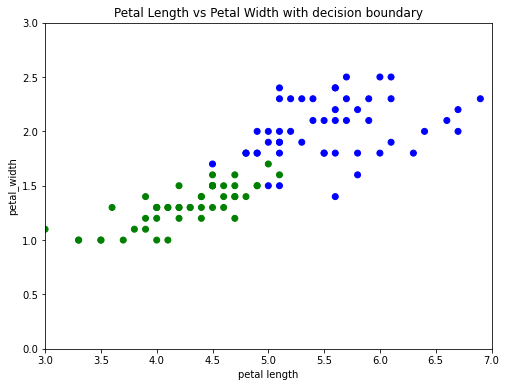

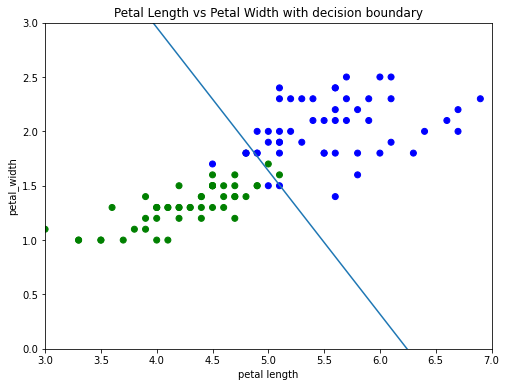

In [34]:
plot_decision_boundary(w)
plot_decision_boundary(w_new)

## B)

Plotting the decision boundary with the learning plot. The output of this function can be seen in part C)

In [35]:
## In your program, include code that shows the progress in two plots: the first should show the current 5 P.
##decision boundary location overlaid on the data; the second should show the learning curve, i.e. a plot of
##the objective function as a function of the iteration.

def gradient_descent_with_learning_plot(x, y, c, w, a, convergence_threshold):
    converged = False
    i = 0
    iteration = []
    objective_function = []
    
    while(not converged):
        iteration.append(i)
        objective_function.append(mean_squared(zip(y,x), w, c))
        
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
        ax2.plot(iteration, objective_function)
        ax2.set_xlabel("Iteration of Gradient Descent")
        ax2.set_ylabel("Objective Function")
        
        
        x_plot = np.linspace(3, 7, 100)
        y_plot = (x_plot * -1 * w[1] + -1*w[2]) / w[0]
        ax1.scatter(irisdata_filtered['petal_length'], irisdata_filtered['petal_width'], c=irisdata_filtered['species'].map(colors))
        ax1.set_xlabel('petal length')
        ax1.set_ylabel('petal_width')
        ax1.set_title('Petal Length vs Petal Width with decision boundary')
        ax1.set_ylim([0, 3])
        ax1.set_xlim([3, 7])
        ax1.plot(x_plot, y_plot)
       
        w_new = summed_gradient(x, y, c, w, a)
        converged = test_convergence(w, w_new, convergence_threshold)
        if(not converged):
            w = w_new
        i += 1
        
    return w_new


## C)

This is a great example of how this works. You can watch as the boundary comes from off the screen to a very good boundary. Additionally, the objective function decreases and then flattens out, which is also perfect to see.

[0.5453097189312199, 0.7187362142083284, -4.4868893177285445]

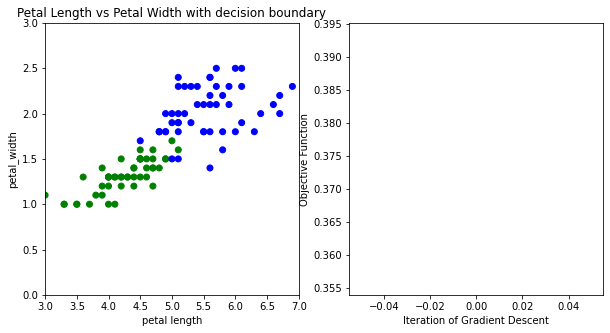

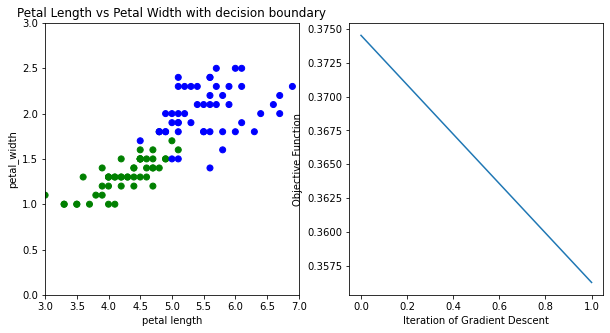

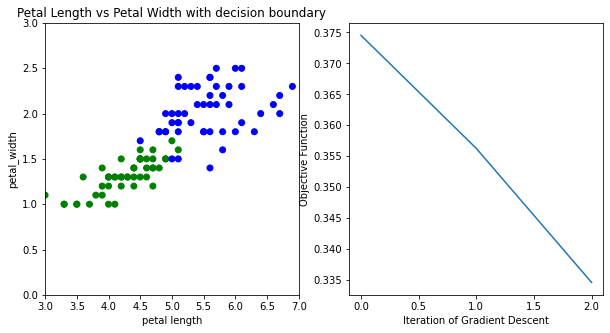

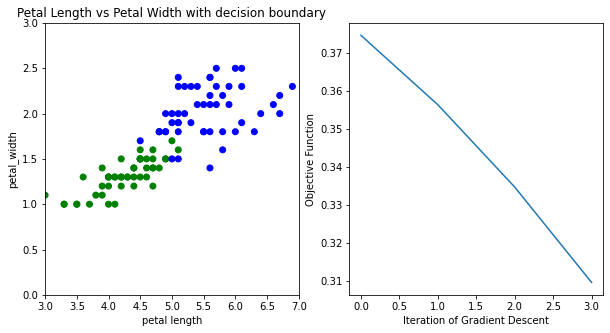

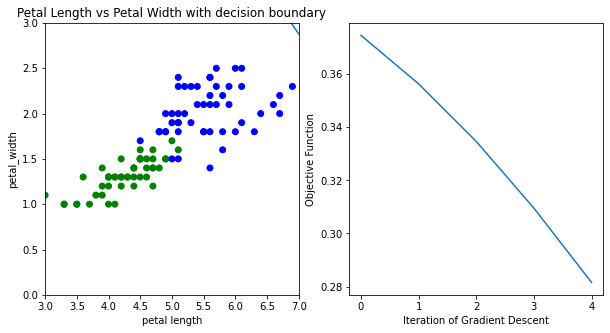

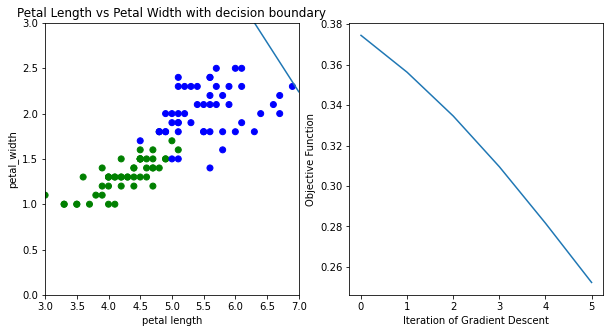

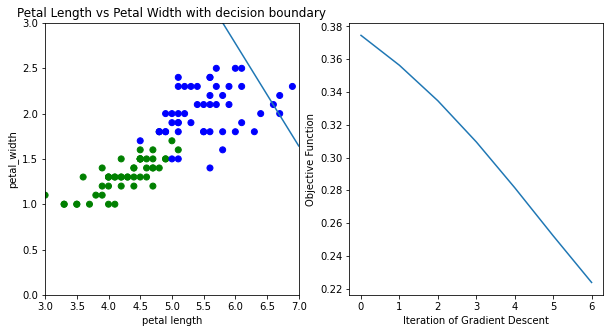

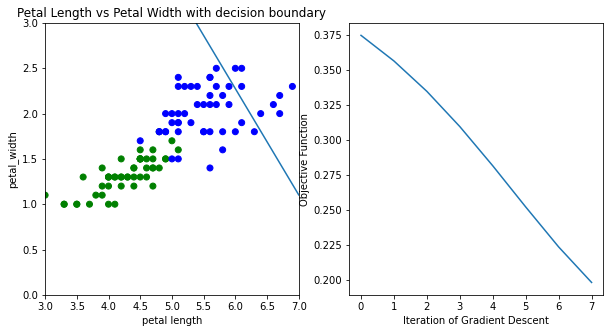

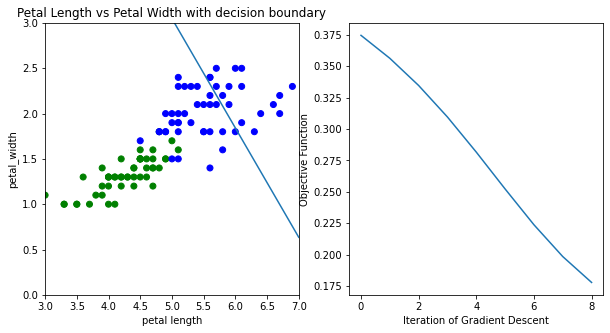

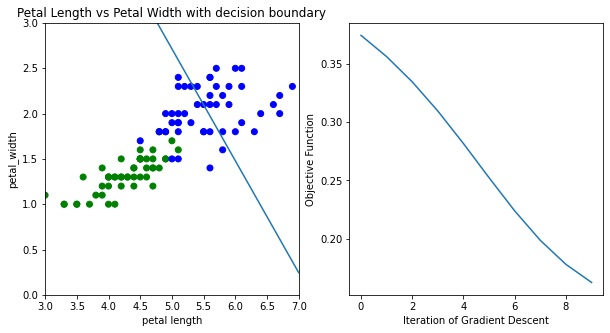

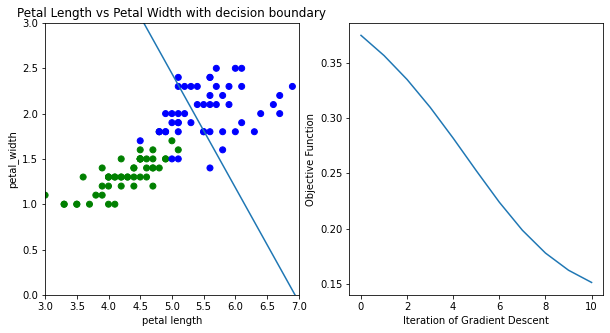

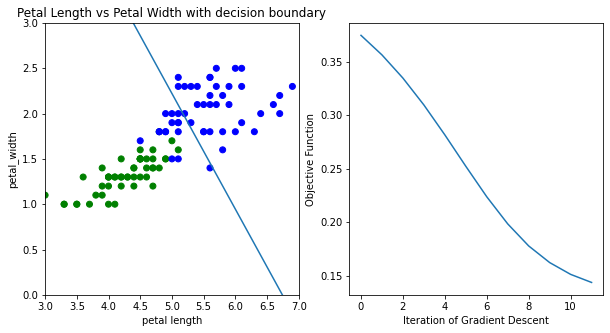

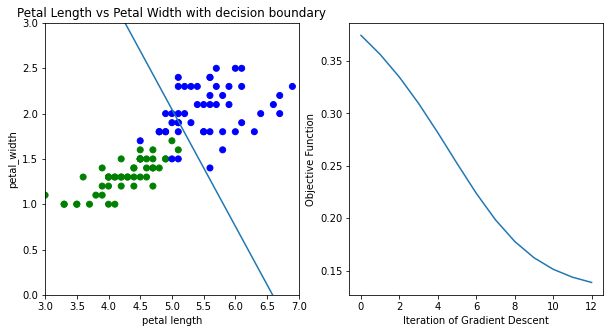

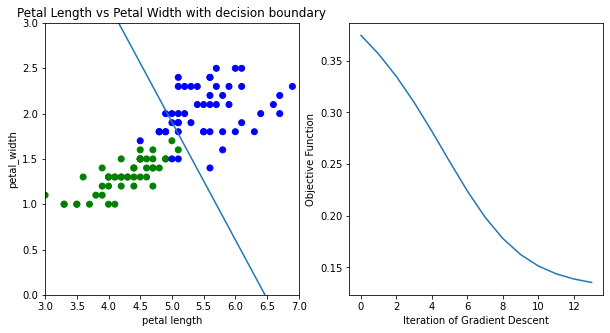

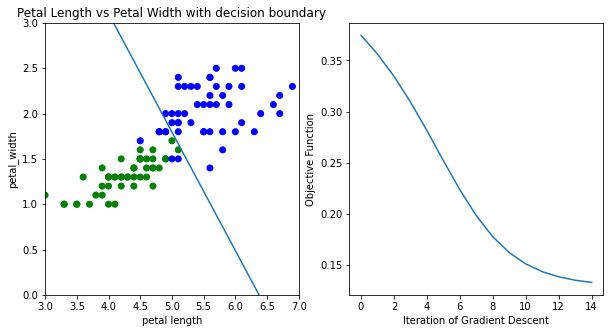

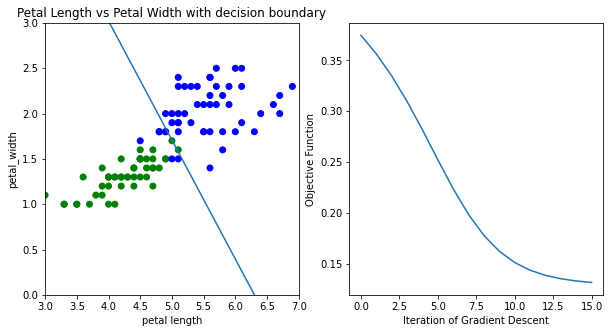

In [36]:
w = [0.4, 0.34,-4.55]
gradient_descent_with_learning_plot(irisdata_filtered['petal_width'], irisdata_filtered['petal_length'], irisdata_filtered['species'], w, .001, 0.01)

## D)

The gradient step size for part C was chosen to be .001. This value worked well to move the decision boundary at a good pace along the gradient but not over jump the ideal. Therefore, after a few iterations, the decision boundary settled in right at the center. I tried also with higher and lower step sizes, but this seemed like a pretty good balance. When I chose a larger number like 0.01 or even 0.005, the boundary would pass over the ideal boundary and then just bounce back and forth on either side of the ideal. When it was too small, like a 0.0001 or 0.0005, it just took forever and sometimes even would settle on a non-ideal place because the boundary would not change more than the convergence threshold and so the program would just stop.  

## E)

The stopping criterion was just the percent change necessary to know that the gradient was no longer changing and the boundary was no longer moving. I set this value at 1% or 0.01. With this value, the gradient descent would only stop if the weights changed by less than 1%. After some testing, this value seemed pretty reasonable for this example since having it larger would make it stop too early and having it too small would often lead to the gradient descent never ending. It was mostly just finding a balance between the step size that was important